In [1]:
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
paragraph = """Coronaviruses are a group of related RNA viruses that cause diseases in mammals and birds. In humans and birds, they cause respiratory tract infections that can range from mild to lethal. Mild illnesses in humans include some cases of the common cold (which is also caused by other viruses, predominantly rhinoviruses), while more lethal varieties can cause SARS, MERS, and COVID-19. In cows and pigs they cause diarrhea, while in mice they cause hepatitis and encephalomyelitis. There are as yet no vaccines or antiviral drugs to prevent or treat human coronavirus infections.
Coronaviruses constitute the subfamily Orthocoronavirinae, in the family Coronaviridae, order Nidovirales, and realm Riboviria.[6][7] They are enveloped viruses with a positive-sense single-stranded RNA genome and a nucleocapsid of helical symmetry.[8] The genome size of coronaviruses ranges from approximately 26 to 32 kilobases, one of the largest among RNA viruses.[9] They have characteristic club-shaped spikes that project from their surface, which in electron micrographs create an image reminiscent of the solar corona, from which their name derives.[10]
Coronaviruses were first discovered in the 1930s when an acute respiratory infection of domesticated chickens was shown to be caused by infectious bronchitis virus (IBV).[15] Arthur Schalk and M.C. Hawn described in 1931 a new respiratory infection of chickens in North Dakota. The infection of new-born chicks was characterized by gasping and listlessness. The chicks' mortality rate was 40–90%.[16] Fred Beaudette and Charles Hudson six years later successfully isolated and cultivated the infectious bronchitis virus which caused the disease.[17] In the 1940s, two more animal coronaviruses, mouse hepatitis virus (MHV) and transmissible gastroenteritis virus (TGEV), were isolated.[18] It was not realized at the time that these three different viruses were related.[19]
Human coronaviruses were discovered in the 1960s.[20][21] They were isolated using two different methods in the United Kingdom and the United States.[22] E.C. Kendall, Malcom Byone, and David Tyrrell working at the Common Cold Unit of the British Medical Research Council in 1960 isolated from a boy a novel common cold virus B814.[23][24][25] The virus was not able to be cultivated using standard techniques which had successfully cultivated rhinoviruses, adenoviruses and other known common cold viruses. In 1965, Tyrrell and Byone successfully cultivated the novel virus by serially passing it through organ culture of human embryonic trachea.[26] The new cultivating method was introduced to the lab by Bertil Hoorn.[27] The isolated virus when intranasally inoculated into volunteers caused a cold and was inactivated by ether which indicated it had a lipid envelope.[23][28] Around the same time, Dorothy Hamre[29] and John Procknow at the University of Chicago isolated a novel cold virus 229E from medical students, which they grew in kidney tissue culture. The novel virus 229E, like the virus strain B814, when inoculated into volunteers caused a cold and was inactivated by ether.[30]
Coronaviruses are large, roughly spherical particles with bulbous surface projections.[42] The average diameter of the virus particles is around 125 nm (.125 μm). The diameter of the envelope is 85 nm and the spikes are 20 nm long. The envelope of the virus in electron micrographs appears as a distinct pair of electron-dense shells (shells that are relatively opaque to the electron beam used to scan the virus particle).[43][44]

The viral envelope consists of a lipid bilayer, in which the membrane (M), envelope (E) and spike (S) structural proteins are anchored.[45] The ratio of E:S:M in the lipid bilayer is approximately 1:20:300.[46] On average a coronavirus particle has 74 surface spikes.[47] A subset of coronaviruses (specifically the members of betacoronavirus subgroup A) also have a shorter spike-like surface protein called hemagglutinin esterase (HE).[6]

The coronavirus surface spikes are homotrimers of the S protein, which is composed of an S1 and S2 subunit. The homotrimeric S protein is a class I fusion protein which mediates the receptor binding and membrane fusion between the virus and host cell. The S1 subunit forms the head of the spike and has the receptor binding domain (RBD). The S2 subunit forms the stem which anchors the spike in the viral envelope and on protease activation enables fusion. The E and M protein are important in forming the viral envelope and maintaining its structural shape.[44]

Inside the envelope, there is the nucleocapsid, which is formed from multiple copies of the nucleocapsid (N) protein, which are bound to the positive-sense single-stranded RNA genome in a continuous beads-on-a-string type conformation.[44][48] The lipid bilayer envelope, membrane proteins, and nucleocapsid protect the virus when it is outside the host cell.[49]
Coronaviruses contain a positive-sense, single-stranded RNA genome. The genome size for coronaviruses ranges from 26.4 to 31.7 kilobases.[9] The genome size is one of the largest among RNA viruses. The genome has a 5′ methylated cap and a 3′ polyadenylated tail.[44]

The genome organization for a coronavirus is 5′-leader-UTR-replicase (ORF1ab)-spike (S)-envelope (E)-membrane (M)-nucleocapsid (N)-3′UTR-poly (A) tail. The open reading frames 1a and 1b, which occupy the first two-thirds of the genome, encode the replicase polyprotein (pp1ab). The replicase polyprotein self cleaves to form 16 nonstructural proteins (nsp1–nsp16).[44]

The later reading frames encode the four major structural proteins: spike, envelope, membrane, and nucleocapsid.[50] Interspersed between these reading frames are the reading frames for the accessory proteins. The number of accessory proteins and their function is unique depending on the specific coronavirus."""

In [3]:
# Preprocessing the data 

#remove numbers
text=re.sub(r'\[[0-9]*\]',' ', paragraph)
#remove extra spaces
text=re.sub(r'\s+',' ',text)
text=text.lower()
#replace non-word character with space
text=re.sub(r'[@#\$%&\*\(\)\<\>\?\'\":;\,\.\]\[-]'," ",text)
text=re.sub(r'\d',' ',text)
#remove extra spaces
text=re.sub(r'\s+',' ',text)

In [4]:
# Preparing the dataset
sentences = nltk.sent_tokenize(text)
sentences

['coronaviruses are a group of related rna viruses that cause diseases in mammals and birds in humans and birds they cause respiratory tract infections that can range from mild to lethal mild illnesses in humans include some cases of the common cold which is also caused by other viruses predominantly rhinoviruses while more lethal varieties can cause sars mers and covid in cows and pigs they cause diarrhea while in mice they cause hepatitis and encephalomyelitis there are as yet no vaccines or antiviral drugs to prevent or treat human coronavirus infections coronaviruses constitute the subfamily orthocoronavirinae in the family coronaviridae order nidovirales and realm riboviria they are enveloped viruses with a positive sense single stranded rna genome and a nucleocapsid of helical symmetry the genome size of coronaviruses ranges from approximately to kilobases one of the largest among rna viruses they have characteristic club shaped spikes that project from their surface which in ele

In [5]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]
sent_word

[['coronaviruses',
  'are',
  'a',
  'group',
  'of',
  'related',
  'rna',
  'viruses',
  'that',
  'cause',
  'diseases',
  'in',
  'mammals',
  'and',
  'birds',
  'in',
  'humans',
  'and',
  'birds',
  'they',
  'cause',
  'respiratory',
  'tract',
  'infections',
  'that',
  'can',
  'range',
  'from',
  'mild',
  'to',
  'lethal',
  'mild',
  'illnesses',
  'in',
  'humans',
  'include',
  'some',
  'cases',
  'of',
  'the',
  'common',
  'cold',
  'which',
  'is',
  'also',
  'caused',
  'by',
  'other',
  'viruses',
  'predominantly',
  'rhinoviruses',
  'while',
  'more',
  'lethal',
  'varieties',
  'can',
  'cause',
  'sars',
  'mers',
  'and',
  'covid',
  'in',
  'cows',
  'and',
  'pigs',
  'they',
  'cause',
  'diarrhea',
  'while',
  'in',
  'mice',
  'they',
  'cause',
  'hepatitis',
  'and',
  'encephalomyelitis',
  'there',
  'are',
  'as',
  'yet',
  'no',
  'vaccines',
  'or',
  'antiviral',
  'drugs',
  'to',
  'prevent',
  'or',
  'treat',
  'human',
  'coronavi

In [6]:
for i in range(len(sent_word)):
    sent_word[i] = [word for word in sent_word[i]
                    if word not in stopwords.words('english')]
sent_word

[['coronaviruses',
  'group',
  'related',
  'rna',
  'viruses',
  'cause',
  'diseases',
  'mammals',
  'birds',
  'humans',
  'birds',
  'cause',
  'respiratory',
  'tract',
  'infections',
  'range',
  'mild',
  'lethal',
  'mild',
  'illnesses',
  'humans',
  'include',
  'cases',
  'common',
  'cold',
  'also',
  'caused',
  'viruses',
  'predominantly',
  'rhinoviruses',
  'lethal',
  'varieties',
  'cause',
  'sars',
  'mers',
  'covid',
  'cows',
  'pigs',
  'cause',
  'diarrhea',
  'mice',
  'cause',
  'hepatitis',
  'encephalomyelitis',
  'yet',
  'vaccines',
  'antiviral',
  'drugs',
  'prevent',
  'treat',
  'human',
  'coronavirus',
  'infections',
  'coronaviruses',
  'constitute',
  'subfamily',
  'orthocoronavirinae',
  'family',
  'coronaviridae',
  'order',
  'nidovirales',
  'realm',
  'riboviria',
  'enveloped',
  'viruses',
  'positive',
  'sense',
  'single',
  'stranded',
  'rna',
  'genome',
  'nucleocapsid',
  'helical',
  'symmetry',
  'genome',
  'size',
  'c

In [7]:
# Training the Word2Vec model
model = Word2Vec(sent_word, min_count=1)

words = model.wv.vocab
words

{'coronaviruses': <gensim.models.keyedvectors.Vocab at 0x21d2cf30198>,
 'group': <gensim.models.keyedvectors.Vocab at 0x21d2cf30048>,
 'related': <gensim.models.keyedvectors.Vocab at 0x21d2cf30208>,
 'rna': <gensim.models.keyedvectors.Vocab at 0x21d2cf30160>,
 'viruses': <gensim.models.keyedvectors.Vocab at 0x21d2cf302b0>,
 'cause': <gensim.models.keyedvectors.Vocab at 0x21d2cf301d0>,
 'diseases': <gensim.models.keyedvectors.Vocab at 0x21d2cf30278>,
 'mammals': <gensim.models.keyedvectors.Vocab at 0x21d2cf303c8>,
 'birds': <gensim.models.keyedvectors.Vocab at 0x21d2cf30320>,
 'humans': <gensim.models.keyedvectors.Vocab at 0x21d2cf30550>,
 'respiratory': <gensim.models.keyedvectors.Vocab at 0x21d2cf30358>,
 'tract': <gensim.models.keyedvectors.Vocab at 0x21d2cf304e0>,
 'infections': <gensim.models.keyedvectors.Vocab at 0x21d2cf305c0>,
 'range': <gensim.models.keyedvectors.Vocab at 0x21d2cf306d8>,
 'mild': <gensim.models.keyedvectors.Vocab at 0x21d2cf305f8>,
 'lethal': <gensim.models.key

In [8]:
# Test the word vectors
vector = model.wv['corona']

print(vector)

[-3.0149624e-03  2.2390995e-03 -4.1309782e-04  4.6806368e-03
  1.7038119e-03  7.0955005e-04 -2.3986937e-03 -6.5178797e-04
  2.9304728e-03 -4.6347589e-03  8.5552907e-05 -4.7700801e-03
  2.8792853e-03  6.7853549e-04 -4.4170880e-05 -8.3348941e-04
 -1.2218863e-03 -3.4877234e-03 -4.0381174e-03 -3.9417725e-03
  8.5709937e-04  4.5701912e-05  4.7491030e-03 -4.1146884e-03
 -1.9921290e-03 -2.2547722e-03  1.4846254e-03  2.2285874e-03
  2.1692347e-03  1.2490972e-03 -2.6749417e-03  3.3507971e-03
  1.3356584e-03  3.2915527e-03  2.7386486e-03 -3.9664120e-03
 -9.6920494e-04  1.9233850e-03  3.2127472e-03 -4.1711624e-03
 -3.1378858e-03 -1.0359625e-03 -1.3848681e-03  4.1946056e-03
 -4.6707168e-03 -1.6050558e-03  2.6177594e-03  4.4893557e-03
  5.5138709e-04 -1.2551285e-03  1.5668104e-03  3.0033544e-03
 -3.3464786e-03  3.5399662e-03 -4.4427975e-03 -1.3931597e-03
 -3.8676618e-03  2.2760548e-03  1.4075270e-03 -7.6509931e-04
 -6.9589805e-05  3.9819260e-03 -2.8309033e-03 -1.9810176e-03
  2.9958808e-03  1.51080

In [9]:
# Most similar words
similar = model.wv.most_similar('corona',topn=20)

similar

[('hepatitis', 0.27436912059783936),
 ('mediates', 0.25285184383392334),
 ('subset', 0.2387862503528595),
 ('infectious', 0.23232273757457733),
 ('listlessness', 0.2144809067249298),
 ('mice', 0.21340444684028625),
 ('one', 0.21091718971729279),
 ('mortality', 0.205677330493927),
 ('activation', 0.196120023727417),
 ('isolated', 0.19346745312213898),
 ('depending', 0.19227656722068787),
 ('specific', 0.19135981798171997),
 ('introduced', 0.1848534345626831),
 ('common', 0.18410202860832214),
 ('receptor', 0.18379443883895874),
 ('envelope', 0.18222105503082275),
 ('fred', 0.1802881956100464),
 ('contain', 0.16265641152858734),
 ('varieties', 0.15924710035324097),
 ('successfully', 0.15555664896965027)]

C:\Users\Rak\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


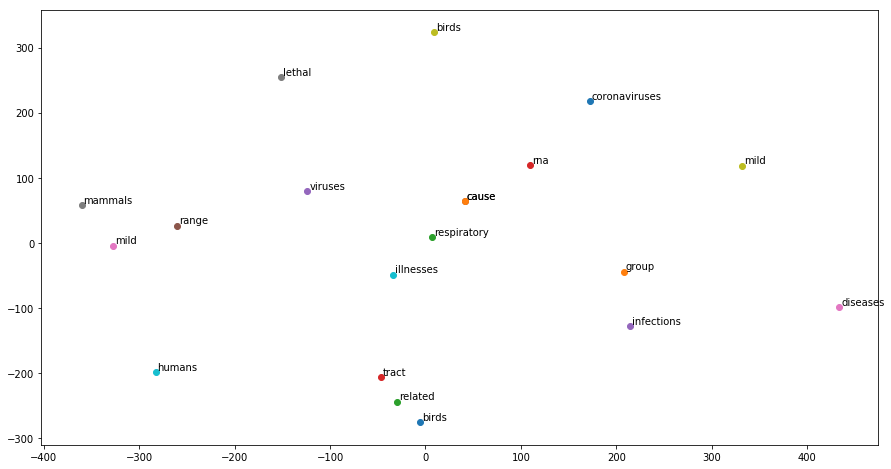

In [10]:
from sklearn.manifold import  TSNE
vocab = ['coronaviruses',
  'group',
  'related',
  'rna',
  'viruses',
  'cause',
  'diseases',
  'mammals',
  'birds',
  'humans',
  'birds',
  'cause',
  'respiratory',
  'tract',
  'infections',
  'range',
  'mild',
  'lethal',
  'mild',
  'illnesses']
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)